In [1]:
!pip install ultralytics

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random, os, cv2, shutil, tqdm, glob


In [3]:
images_path = 'colorful_fashion_dataset_for_object_detection/JPEGImages/'
annotations_path = 'colorful_fashion_dataset_for_object_detection/Annotations_txt/'
path = 'colorful_fashion_dataset_for_object_detection/'

In [4]:
from ultralytics import YOLO

detection_model = YOLO('yolov8m.pt')

In [10]:
import torch
print(f"Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Using torch 2.2.2 (CPU)


WARNING ⚠️ 'line_thickness' is deprecated and will be removed in 'ultralytics 8.399999999999999' in the future. Please use 'line_width' instead.
WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.399999999999999' in the future. Please use 'show_labels' instead.



Found https://i.stack.imgur.com/GRdCC.jpg locally at GRdCC.jpg
image 1/1 /Users/nicolaspertierra/Downloads/Documents/Documents/Clothe_detector/GRdCC.jpg: 448x640 1 person, 1 bicycle, 5 cars, 1 truck, 471.9ms
Speed: 11.1ms preprocess, 471.9ms inference, 3644.0ms postprocess per image at shape (1, 3, 448, 640)


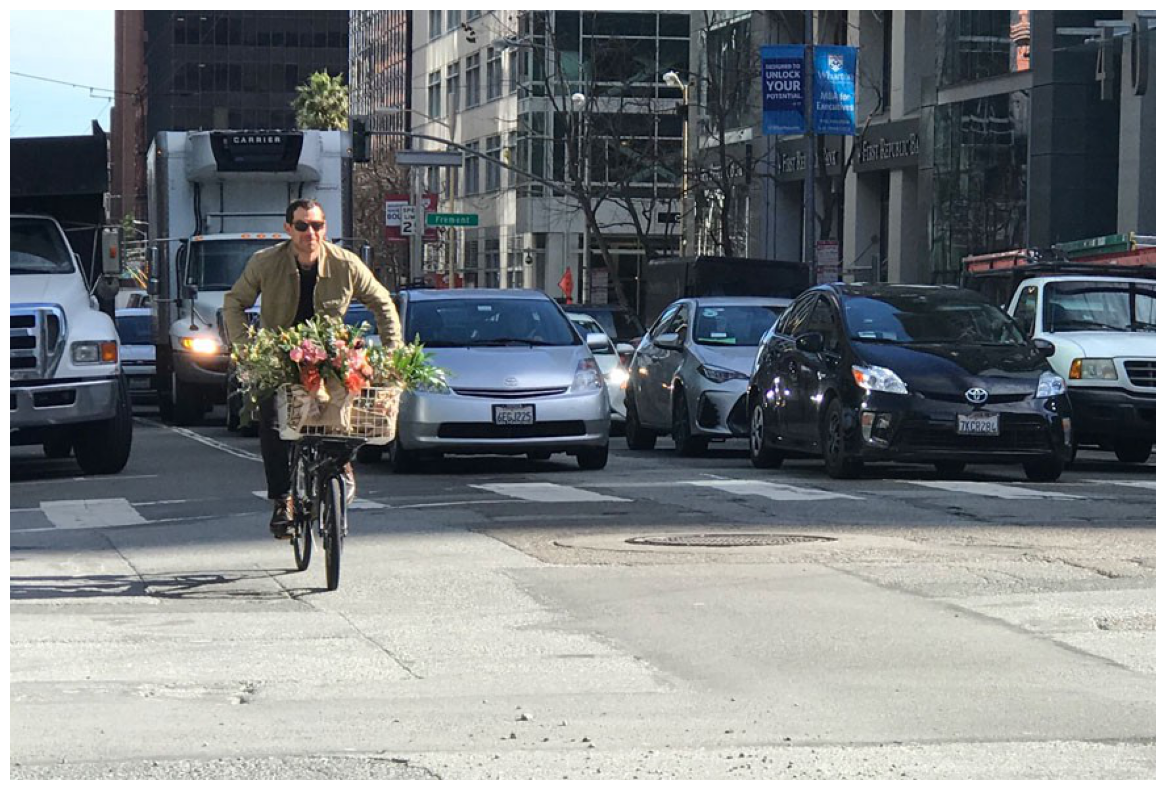

In [11]:
img = random.choice(os.listdir(images_path))

i = detection_model.predict(source='https://i.stack.imgur.com/GRdCC.jpg', conf=0.5, line_thickness=2, hide_labels=False)

im = plt.imread('GRdCC.jpg')
plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(im)


In [27]:
def convert(size, x, y, w, h):
    box = np.zeros(4)
    dw = 1./size[0]
    dh = 1./size[1]
    x = x/dw
    w = w/dw
    y = y/dh
    h = h/dh

    box[0] = x - (w/2.0)
    box[1] = x + (w/2.0)
    box[2] = y - (h/2.0)
    box[3] = y + (h/2.0)

    return (box)

def plot_annotations(img, filename):
    with open(annotations_path + filename, 'r') as f:
        for line in f:
            value = line.split()
            cls = int(value[0])
            x = float(value[1])
            y = float(value[2])
            w = float(value[3])
            h = float(value[4])

            img_h, img_w = img.shape[:2]
            bb = convert((img_w, img_h), x, y, w, h)
            cv2.rectangle(img, (int(round(bb[0])), int(round(bb[2]))), (int(round(bb[1])), int(round(bb[3]))), (255, 0, 0), 2)
            plt.axis('off')
            plt.imshow(img)

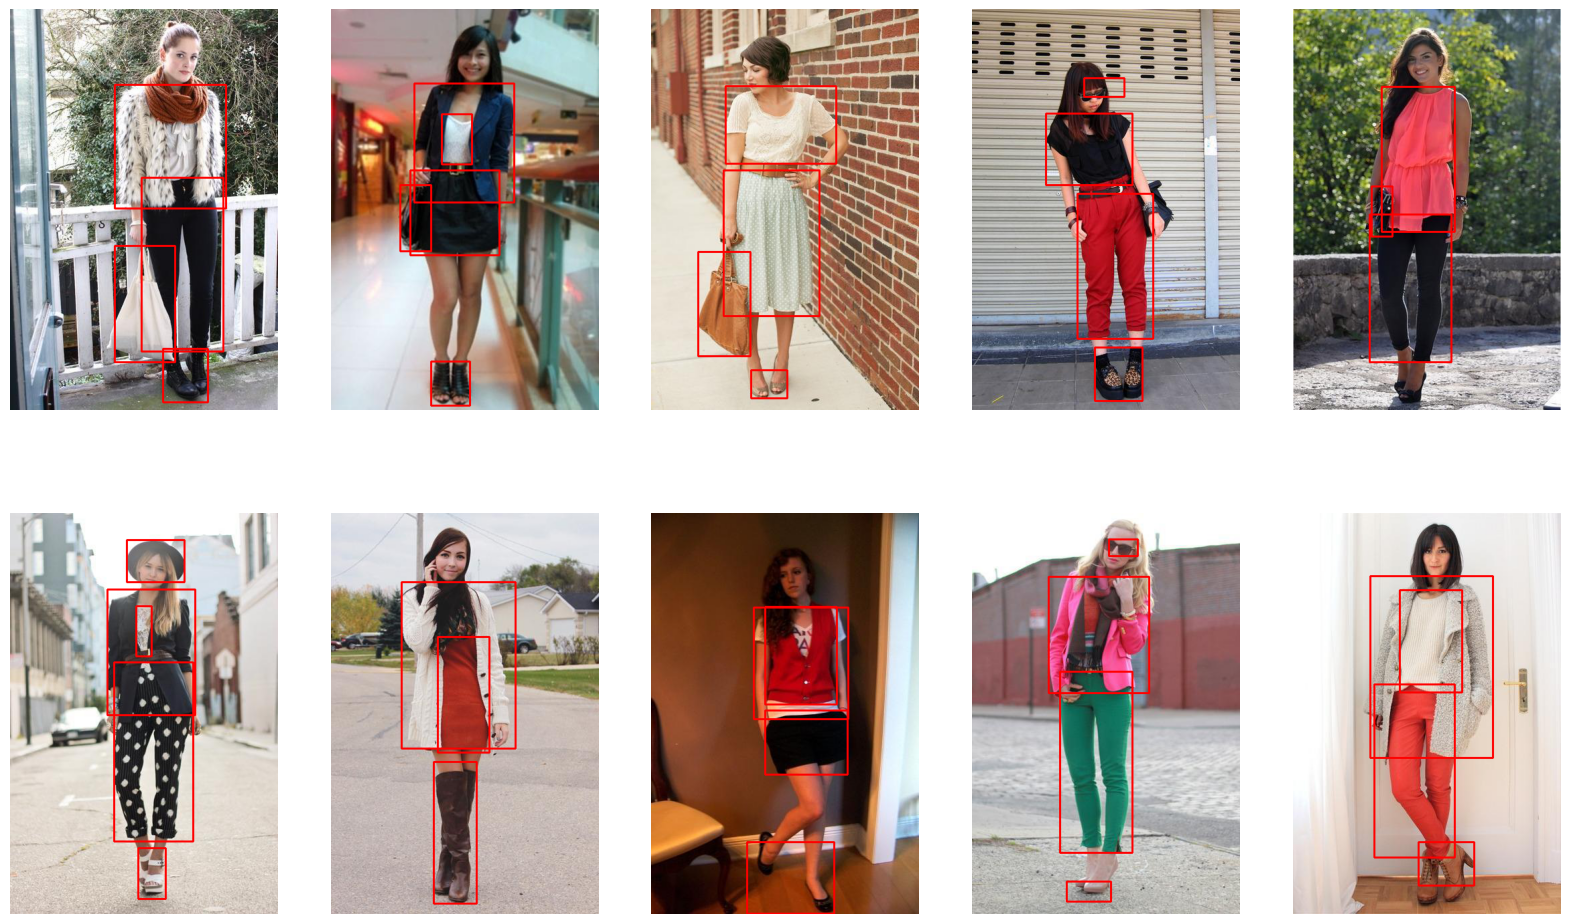

In [29]:
import os, random, matplotlib.pyplot as plt, cv2, numpy as np

plt.figure(figsize= (20, 12))
ls = os.listdir(images_path)
c = 1

for i in random.sample(ls, 10):
    img = plt.imread(images_path + i)
    img = np.copy(img)  # create a writable copy
    i = i.rstrip('.jpg') + '.txt'
    plt.subplot(2, 5, c)
    plot_annotations(img, i)
    c += 1

In [36]:
train = []
with open(path + 'ImageSets/Main/trainval.txt', 'r') as f:
    for line in f.readlines():
        if line[-1] == '\n':
            line = line[: -1]
        train.append(line)

test = []
with open(path + 'ImageSets/Main/test.txt', 'r') as f:
    for line in f.readlines():
        if line[-1] == '\n':
            line = line[: -1]
        test.append(line)

In [37]:
len(train), len(test)

(2145, 537)

In [38]:
os.mkdir('train')
os.mkdir('train/images')
os.mkdir('train/labels')

os.mkdir('test')
os.mkdir('test/images')
os.mkdir('test/labels')

In [41]:
train_path = 'train/'
test_path = 'test/'

print('Copying train data..!!')
for i in tqdm.tqdm(train):
    a = shutil.copyfile(images_path + i + '.jpg', train_path + 'images/' + i + '.jpg')
    a = shutil.copyfile(annotations_path + i + '.txt', train_path + 'labels/' + i + '.txt')

print('Copying test data..!!')
for i in tqdm.tqdm(test):
    a = shutil.copyfile(images_path + i + '.jpg', test_path + 'images/' + i + '.jpg')
    a = shutil.copyfile(annotations_path + i + '.txt', test_path + 'labels/' + i + '.txt')
    

Copying train data..!!


100%|██████████| 2145/2145 [00:03<00:00, 565.06it/s]


Copying test data..!!


100%|██████████| 537/537 [00:00<00:00, 673.28it/s]


In [45]:
text = '''
train: train/
val: test/

# number of classes
nc: 10

# class names
names: ['sunglass', 'hat', 'jacket', 'shirt', 'pants', 'shorts', 'skirt', 'dress', 'bag', 'shoe']
'''

with open('data.yaml', 'w') as file:
    file.write(text)

In [49]:
model = YOLO('yolov8m.pt')

model.train(data= '/Users/nicolaspertierra/Desktop/Clothe_detector/data.yaml', epochs= 5)

KeyboardInterrupt: 

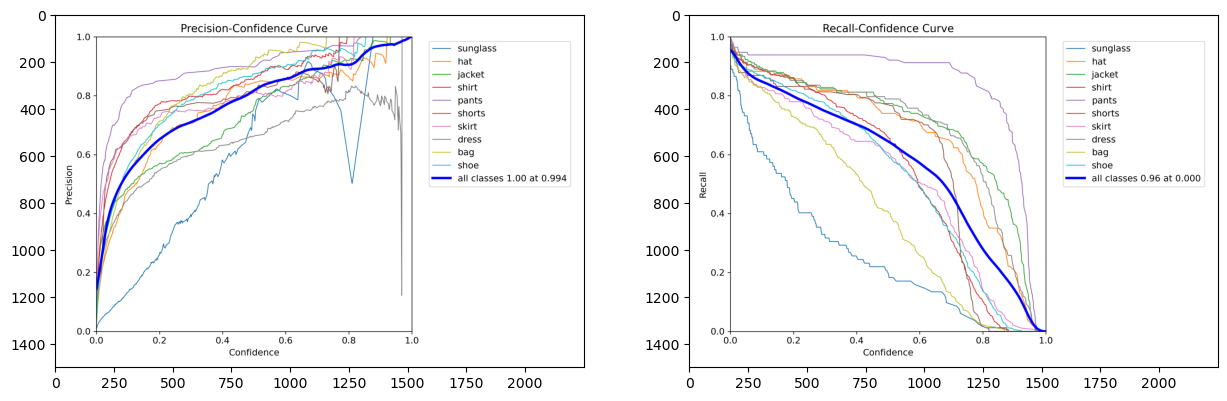

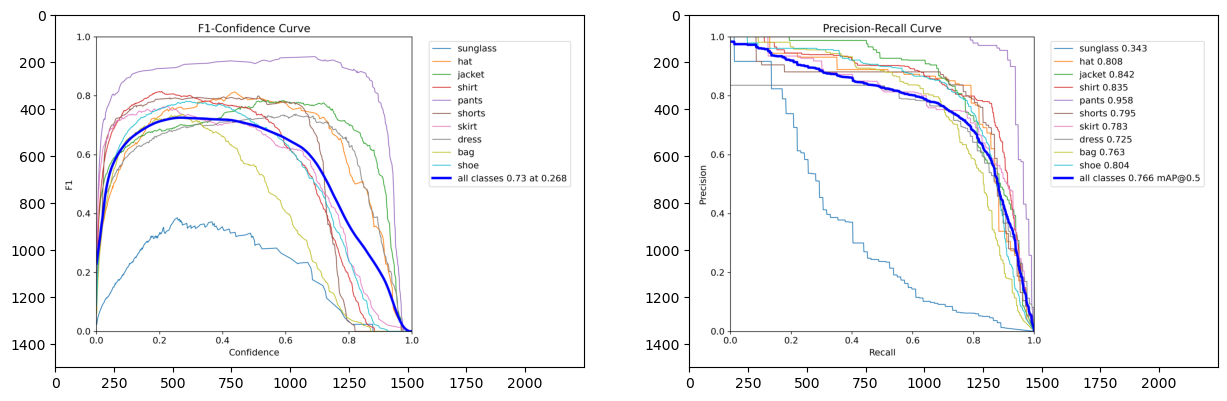

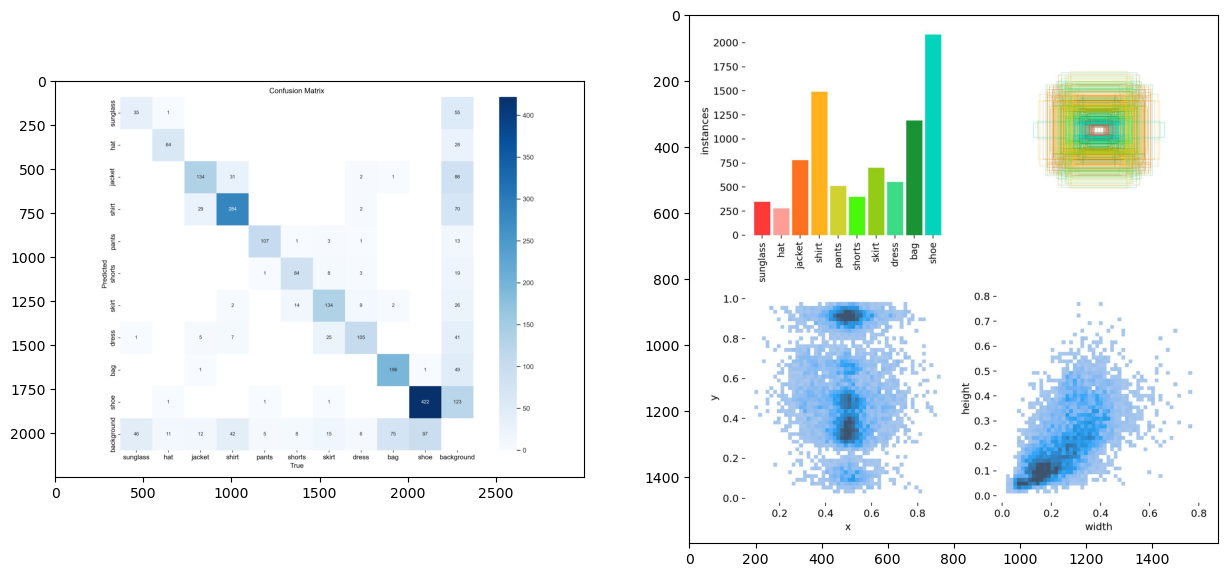

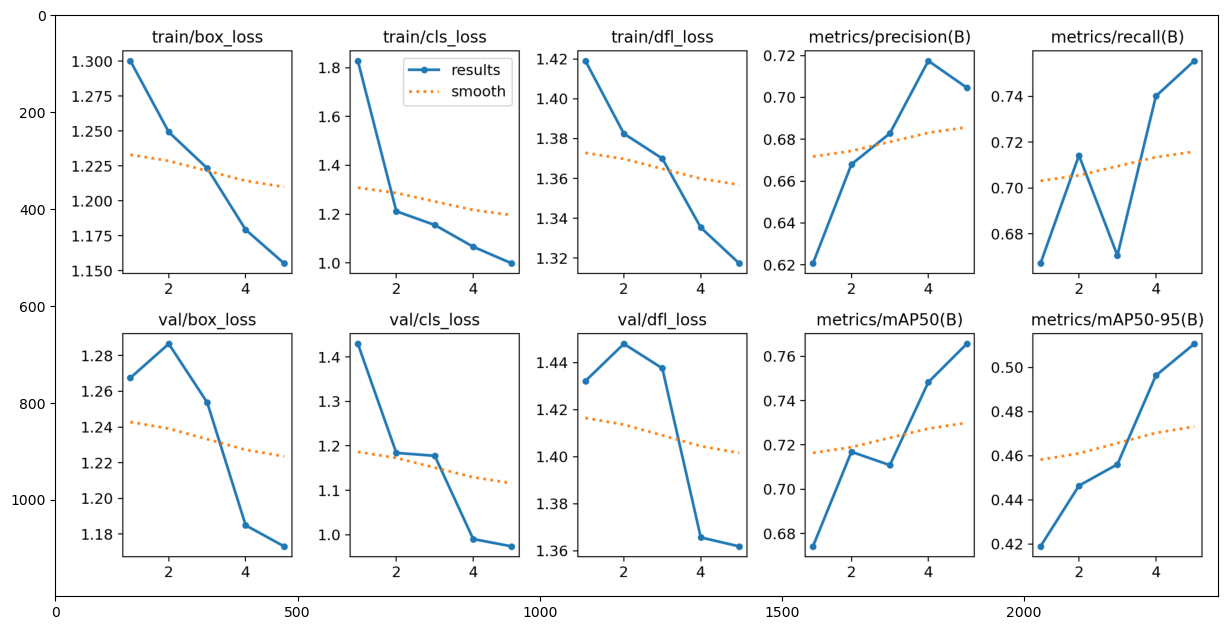

In [54]:
%matplotlib inline

model_path = 'runs/detect/train/'

def plot(ls, size):
    c = 1
    plt.figure(figsize= (15, 10))
    for im in ls:
        plt.subplot(size[0], size[1], c)
        im = plt.imread(model_path + im)
        plt.imshow(im)
        c += 1
    plt.show()

plot(['P_curve.png', 'R_curve.png'], (1, 2))
plot(['F1_curve.png', 'PR_curve.png'], (1, 2))
plot(['confusion_matrix.png', 'labels.jpg'], (1, 2))
plot(['results.png'], (1, 1))

In [72]:
plt.figure(figsize=(20, 20))
imgs = random.sample(os.listdir(images_path), 6)

for img in imgs:
    i = model.predict(source=images_path + img, conf=0.4, save=True, save_dir='runs/detect/predict2/', line_thickness=2)


WARNING ⚠️ 'line_thickness' is deprecated and will be removed in 'ultralytics 8.299999999999999' in the future. Please use 'line_width' instead.

image 1/1 /Users/nicolaspertierra/Desktop/Clothe_detector/colorful_fashion_dataset_for_object_detection/JPEGImages/1931.jpg: 640x448 2 persons, 4 bicycles, 1 car, 347.3ms
Speed: 2.7ms preprocess, 347.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict
WARNING ⚠️ 'line_thickness' is deprecated and will be removed in 'ultralytics 8.299999999999999' in the future. Please use 'line_width' instead.

image 1/1 /Users/nicolaspertierra/Desktop/Clothe_detector/colorful_fashion_dataset_for_object_detection/JPEGImages/4619.jpg: 640x448 1 person, 1 handbag, 383.2ms
Speed: 2.1ms preprocess, 383.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict
WARNING ⚠️ 'line_thickness' is deprecated and will be removed in 'ultralytics 8.299999999999999' in the f

<Figure size 2000x2000 with 0 Axes>